<a href="https://colab.research.google.com/github/Eastonco/CS437/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpha_vantage

import requests
import os
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sys
from google.colab import files
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

alphaApiKey = 'E8W35C5TN8X7J43D'

ticker = 'SPY'

     |████████████████████████████████| 1.3MB 11.1MB/s 
     |████████████████████████████████| 143kB 47.2MB/s 
     |████████████████████████████████| 296kB 50.2MB/s 


{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'SPY',
 '3. Last Refreshed': '2021-04-26',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}


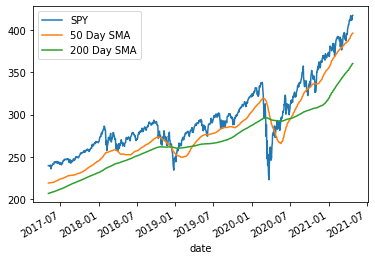

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-04-26,417.440000,418.220000,416.811100,417.610000,417.610000,52182392.0,0.0,1.0
2021-04-23,412.870000,418.250000,412.790000,416.740000,416.740000,73276195.0,0.0,1.0
2021-04-22,415.890000,416.780000,411.130000,412.270000,412.270000,97582788.0,0.0,1.0
2021-04-21,411.510000,416.290000,411.360000,416.070000,416.070000,66792983.0,0.0,1.0
2021-04-20,413.910000,415.085900,410.590000,412.170000,412.170000,81851828.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2017-05-11,239.350006,239.570007,238.130005,239.380005,222.154896,62358300.0,0.0,1.0
2017-05-10,239.389999,239.869995,239.149994,239.869995,222.609628,54293800.0,0.0,1.0
2017-05-09,239.960007,240.190002,239.039993,239.440002,222.210576,51363200.0,0.0,1.0


<Figure size 432x288 with 0 Axes>

In [ ]:

# ALPHA VANTAGE REQUEST
ts = TimeSeries(key=alphaApiKey, output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol=ticker, outputsize='full')

pprint(meta_data)

data = data.head(1000)

data['4. close'].plot(label=ticker)

ti = TechIndicators(key=alphaApiKey, output_format='pandas')

# 200 + 50 Day SMA lines for plotting
ti50Data, ti50Meta_data = ti.get_sma(
    symbol=ticker, interval='daily', time_period=50)
sma50 = ti50Data.tail(1000)
sma50['SMA'].plot(label='50 Day SMA')
sma50 = sma50.iloc[::-1] # need to reverse order as it doesn't match price data


ti200Data, ti200Meta_data = ti.get_sma(
    symbol=ticker, interval='daily', time_period=200)
sma200 = ti200Data.tail(1000)
sma200['SMA'].plot(label='200 Day SMA')
sma200 = sma200.iloc[::-1]


plt.legend()
plt.show()
plt.savefig("stonks.png")
data



In [ ]:
# unplotable indicators

ti2 = TechIndicators(key=alphaApiKey, output_format='pandas')

# MACD
macd, macd_meta = ti2.get_macd(symbol=ticker)
macd = macd.iloc[::-1]

# RSI
rsi, rsi_meta = ti2.get_rsi(symbol=ticker)
rsi = rsi.iloc[::-1]

macd



,MACD_Signal,MACD_Hist,MACD
date,,,
1999-12-17,0.8888,-0.1628,0.7260
1999-12-20,0.8475,-0.1654,0.6821
1999-12-21,0.8291,-0.0736,0.7555
1999-12-22,0.8282,-0.0036,0.8246
1999-12-23,0.8610,0.1314,0.9925
...,...,...,...
2021-04-20,6.1643,0.4807,6.6450
2021-04-21,6.2544,0.3603,6.6147
2021-04-22,6.2460,-0.0336,6.2124


In [ ]:
X = []
y = []

def calculateChange(x1, x2):
  return (np.round((x2-x1)/np.absolute(x1)*100, 2))
  # returning the percent change rounded 2 digits in the format 99.99%


for event in data:
   print(event)


print("Data Len:",len(data))

for i in range(len(data)-2):
  event = []
  i += 1

  event.append(data['6. volume'][i])

  prevClose = data['4. close'][i-1]
  close = data['4. close'][i]

  event.append(calculateChange(prevClose, close))

  diff200 = np.round(data['4. close'][i] - sma200['SMA'][i], 2)
  diff50 = np.round(data['4. close'][i] - sma50['SMA'][i], 2)
  event.append(diff200)
  event.append(diff50)

  event.append(rsi['RSI'][i])
  event.append(macd['MACD'][i])
  
  # pprint(event)
  X.append(event)

  nextclose = data['4. close'][i+1]
  if close > nextclose:
    y.append(0)
  else:
    y.append(1)
  

print("Feature Len:",len(X))
print("Labels:",y)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)
X_train = (X_train - train_mean) / train_std

print("X_Train len: ",len(X_train))
print("X_test len: ",len(X_test))



1. open
2. high
3. low
4. close
5. adjusted close
6. volume
7. dividend amount
8. split coefficient
Data Len: 1000
Feature Len: 998
Labels: [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1


....................................................................................................
......................................
Final Root Mean Square Error on validation set: 0.719


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11/11 [==============================] - 0s 3ms/step - loss: 0.2391 - mae: 0.4572 - mse: 0.2391
Root Mean Square Error on test set: 0.489


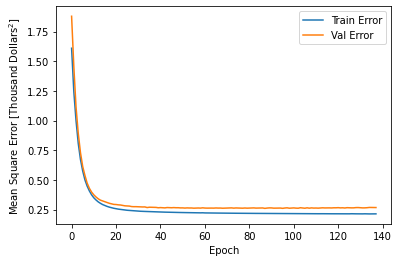

In [ ]:

def build_model():
    model = keras.Sequential([
        Dense(10, activation=tf.nn.relu, input_shape=[len(X_train[0])]), #changed 20 -> 10, # of hidden nodes
        Dense(1)
    ])

    model.compile(optimizer=tf.optimizers.Adam(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

mse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(np.sqrt(mse_final), 3)))

# Here is a plot of the loss function values on training and testing sets.
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('a Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.savefig("mse.png")

plot_history()

test_features_norm = (X_test - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

Epoch 1/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.5656
Epoch 2/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.5578
Epoch 3/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.5696
Epoch 4/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.5583
Epoch 5/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.2846 - accuracy: 0.5712
Epoch 6/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.5659
Epoch 7/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.2562 - accuracy: 0.5800
Epoch 8/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.2481 - accuracy: 0.5865
Epoch 9/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.6078
Epoch 10/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.2439 - accuracy: 0.5771

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

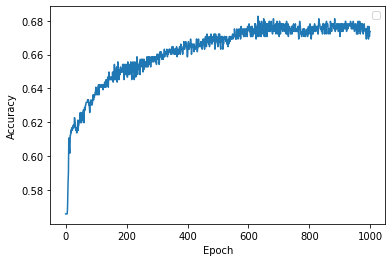

In [ ]:


def build_model_ac():
    model = keras.Sequential([
        Dense(10, activation=tf.nn.softmax, input_shape=[len(X_train[0])]), #changed 20 -> 10, # of hidden nodes
        #Dense(5, activation=tf.nn.softmax), #changed 20 -> 10, # of hidden nodes
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

model = build_model_ac()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(X_train, y_train, epochs=1000, verbose=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
model.summary()

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

def plot_accuracy():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'])
    plt.legend()
    plt.savefig("acc.png")

plot_accuracy()



No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

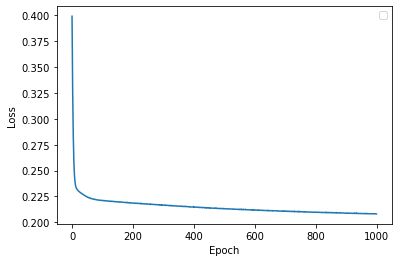

In [ ]:
def plot_loss():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'])
    plt.legend()
    plt.savefig("loss.png")

plot_loss()

In [ ]:


from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

classifiers = [
    (DecisionTreeClassifier(criterion="entropy"), "Decision Tree"),
    (KNeighborsClassifier(n_neighbors=5), "5NN"),
    (KMeans(n_clusters=2), "2-Means")
]

def Normalize(X):
    min_value = min(X)
    range = max(X) - min_value
    new_list = [(x-min_value)/range for x in X]
    return new_list


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X.transpose()
for n in range(X.shape[0]):
    X[n] = Normalize(X[n])
X.transpose()

X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.33)


for clf, name in classifiers:
    clf.fit(X_train, y_train)
    newlabels = clf.predict(X_test)
    print("Classifier:", name)
    print("Accuracy:", metrics.accuracy_score(y_test, newlabels), "\n")

Classifier: Decision Tree
Accuracy: 0.5484848484848485 

Classifier: 5NN
Accuracy: 0.5272727272727272 

Classifier: 2-Means
Accuracy: 0.6090909090909091 

